In [1]:
!pip install Pillow
!pip install matplotlib

In [5]:
import urllib.request

# 이미지 주소들을 리스트(목록)로 만듭니다
urls = [
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png",
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png",
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png"
]

# 저장할 파일 이름들도 목록으로 만듭니다
filenames = ["lenna.png", "baboon.png", "barbara.png"]

# 하나씩 순서대로 다운로드합니다
for url, filename in zip(urls, filenames):
    urllib.request.urlretrieve(url, filename)
    print(f"{filename} Download Complete!")

lenna.png Download Complete!
baboon.png Download Complete!
barbara.png Download Complete!


In [7]:
from PIL import Image

def get_concat_h(img1,img2):
    # concat the image horizontally
    dst = Image.new('RGB',(img1.width+img2.width,img1.height)) # make new empty image frame, (width,height)
    dst.paste(img1,(0,0)) # dst에 이미지 붙여넣기, (0,0)은 왼쪽 맨위
    dst.paste(img2, (img1.width,0)) # dst에 두번째 이미지 붙여넣기 

    return dst

In [13]:
import os

my_image = "lenna.png"

cwd = os.getcwd()
print("Current directory: ", cwd)

# os.path.join() : concat the directory no matter what os(linux, windows...) you use
# Why don't use just '+'? : Window use (\), Linux use (/)
image_path = os.path.join(cwd, my_image)
print("Image whole path: ", image_path)

Current directory:  c:\Users\SeungWoo\OneDrive\Desktop\Devprojects\practice\AI\IBM_computervision
Image whole path:  c:\Users\SeungWoo\OneDrive\Desktop\Devprojects\practice\AI\IBM_computervision\lenna.png


In [14]:
from PIL import Image

image = Image.open(image_path) # instance

print(type(image))

<class 'PIL.PngImagePlugin.PngImageFile'>


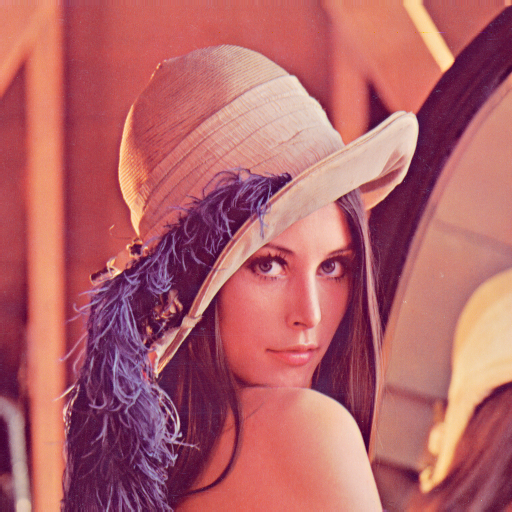

In [15]:
image

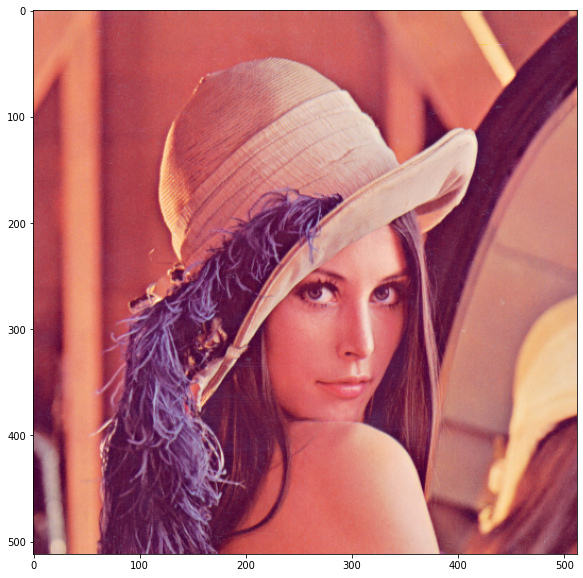

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.imshow(image) # imshow : img show
plt.show()


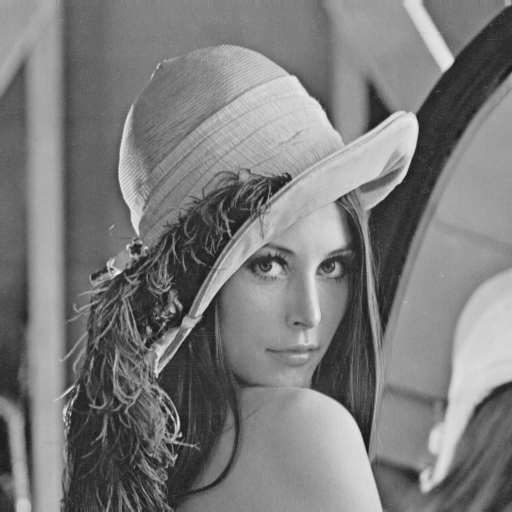

In [18]:
# 1. Convert to a grayscale
# to reduce capacity
from PIL import ImageOps

image_gray = ImageOps.grayscale(image)

image_gray

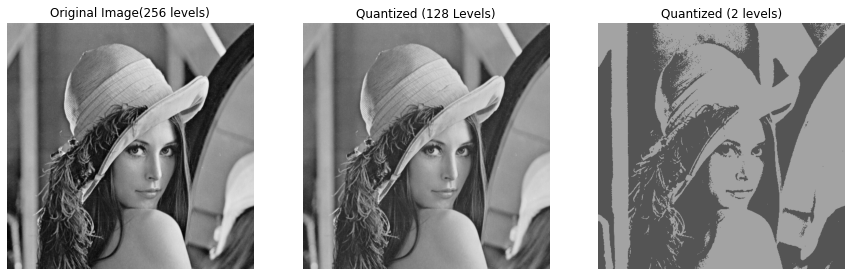

In [39]:
# 2. Quantization 
# reduce the intensity from (0~255) 

quantized_drastic = image_gray.quantize(2)
quantized_image = image_gray.quantize(256//2)

fig,axes = plt.subplots(1,3,figsize=(15,5))

axes[0].imshow(image_gray,cmap = 'gray')
axes[0].set_title("Original Image(256 levels)")
axes[0].axis('off')

axes[1].imshow(quantized_image.convert('RGB'))
axes[1].set_title("Quantized (128 Levels)")
axes[1].axis('off')

axes[2].imshow(quantized_drastic.convert('RGB'))
axes[2].set_title("Quantized (2 levels)")
axes[2].axis('off')

plt.show()

In [37]:
# .convert('RGB')가 어떻게 바꾸는지 확인 
print("변환 전:", quantized_image.mode)

print("변환 후:", quantized_image.convert('RGB').mode)

변환 전: P
변환 후: RGB


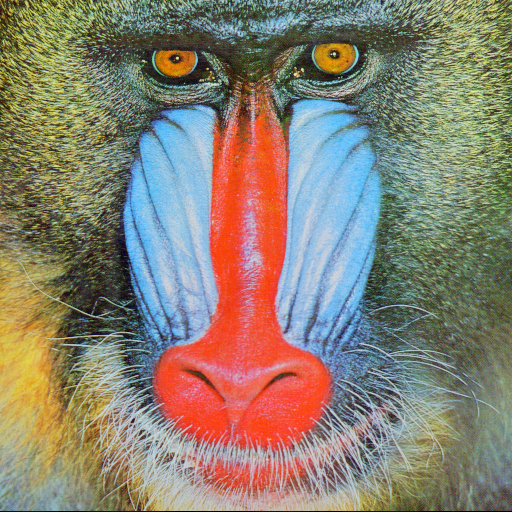

In [40]:
baboon = Image.open('baboon.png')
baboon

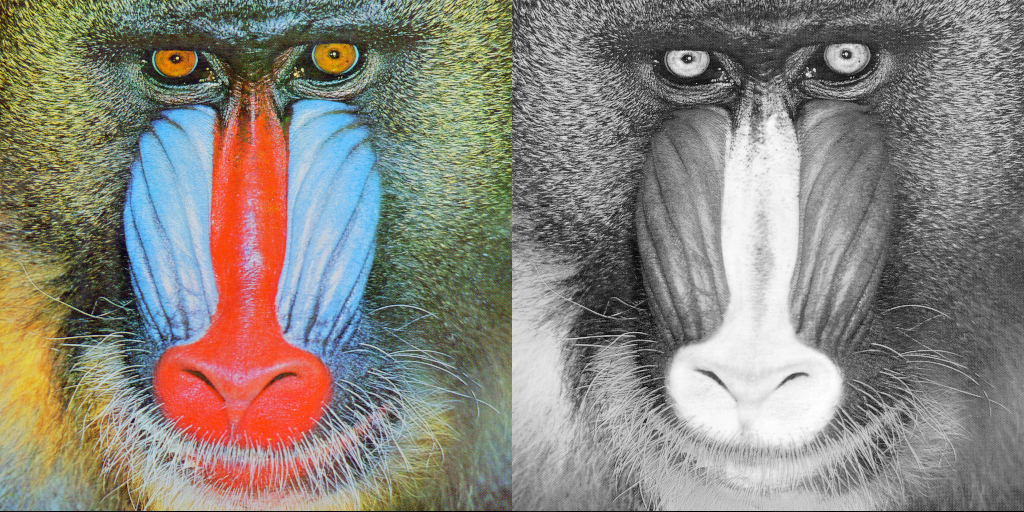

In [44]:
# Let's split baboon into R,G,B channel

red,green,blue = baboon.split()
get_concat_h(baboon,red)

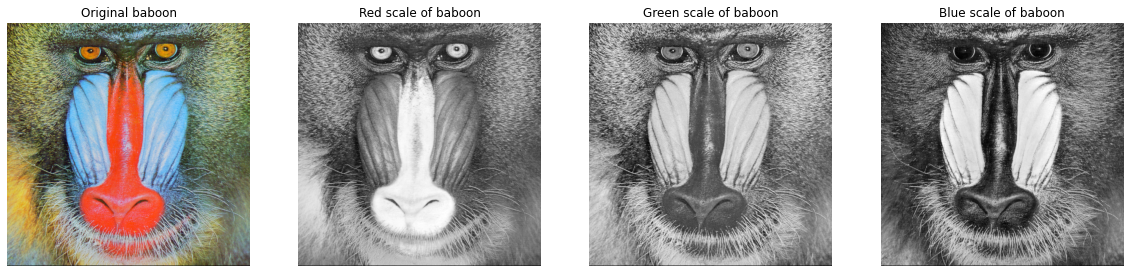

In [ ]:
fig,axes = plt.subplots(1,4,figsize=(20,5))

axes[0].imshow(baboon)
axes[0].set_title("Original baboon")
axes[0].axis('off')

axes[1].imshow(red, cmap= 'gray')
axes[1].set_title("Red scale of baboon")
axes[1].axis('off')

axes[2].imshow(green, cmap= 'gray')
axes[2].set_title("Green scale of baboon")
axes[2].axis('off')

axes[3].imshow(blue, cmap= 'gray')
axes[3].set_title("Blue scale of baboon")
axes[3].axis('off')


plt.show()

# Brown : red + green and make it dark
# yellow : red + green 
# mostly there is no need for blue scale, so blue scale image looks mostly dark

In [54]:
# Image to Array

import numpy as np

image_array = np.array(image)
print("The type is: ", type(image_array))

The type is:  <class 'numpy.ndarray'>


In [56]:
print(image_array.shape)
print(image_array)
print(image_array.min())
print(image_array.max())

(512, 512, 3)
[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]
3
255


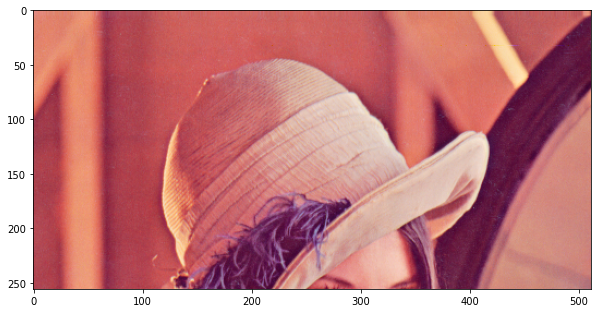

In [58]:
# Slicing

rows = 256
plt.figure(figsize=(10,10))

plt.imshow(image_array[0:rows, :, :]) # (0:rows) = Cut the vertical line (row) from 0 to just before 256.
plt.show()

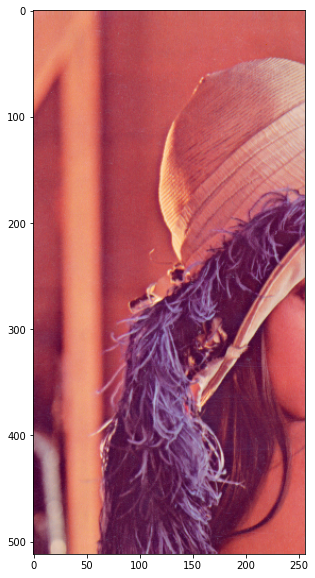

In [59]:
columns = 256

plt.figure(figsize=(10,10))

plt.imshow(image_array[:, 0:columns, :])
plt.show()

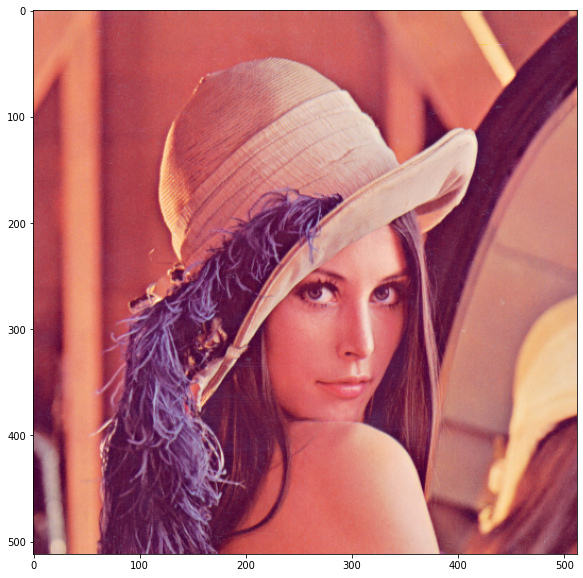

In [60]:
# Copy : To preserve the original

A = image_array.copy()

plt.figure(figsize=(10,10))
plt.imshow(A)
plt.show()

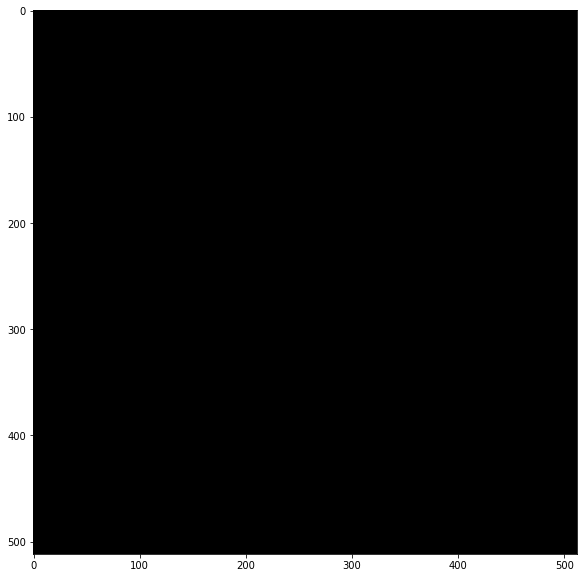

In [62]:
# Why copy is important? : Reference vs Copy

B = A # what if we use reference instead of copy?

A[:,:,:] = 0

plt.figure(figsize=(10,10))
plt.imshow(B)
plt.show()

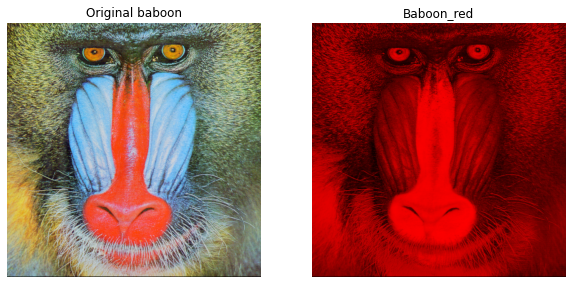

In [ ]:
baboon_array = np.array(baboon)
baboon_red = baboon_array.copy()

baboon_red[:,:,1] = 0 #(all width,all height, green from rgb(0,1,2) channel)
baboon_red[:,:,2] = 0

fig,axes = plt.subplots(1,2,figsize=(10,5))

axes[0].imshow(baboon)
axes[0].set_title("Original baboon")
axes[0].axis('off')

axes[1].imshow(baboon_red)
axes[1].set_title("Baboon_red")
axes[1].axis('off')


plt.show()

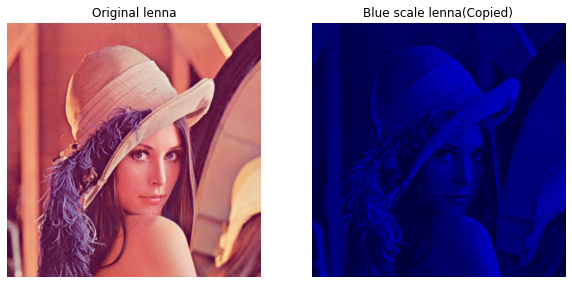

In [ ]:
# Small Quiz : use lenna.png -> convert to array -> preserve only blue -> plt.show()
# my_image is for lenna.png 
# PIL Blueprint : path(to create instance) -> convert to array -> manipulate -> show 

my_image = "lenna.png"
cwd = os.getcwd()
image_path = os.path.join(cwd,my_image)

lenna = Image.open(image_path)

lenna_array = np.array(lenna)
lenna_blue = lenna_array.copy() # for safety let's use copy

lenna_blue[:,:,0] = 0 
lenna_blue[:,:,1] = 0

fig,axes = plt.subplots(1,2,figsize=(10,5))

axes[0].imshow(lenna)
axes[0].set_title("Original lenna")
axes[0].axis('off')

axes[1].imshow(lenna_blue)
axes[1].set_title("Blue scale lenna(Copied)")
axes[1].axis('off')

plt.show()